<a href="https://colab.research.google.com/github/crisdavid3335/analytics_with_KERAS/blob/main/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


In [2]:
# Vamos a cargar los datos
(train_images, train_labels), _ = mnist.load_data()

# Le damos formatos en dos dimensiones
train_images = train_images.reshape((60000, 28*28))

# Los metemos en el rango de 0 a 1
train_images = train_images.astype(np.float_)/255

In [3]:
# Vamos a generar ruido en los datos

# Un conjunto con números aleatorios
train_images_with_noise_channels = np.concatenate([train_images, 
                                                   np.random.random((len(train_images), 28*28))], 
                                                   axis = 1)

# Un conjunto lleno de ceros
train_images_with_zeros_channels = np.concatenate([train_images, 
                                                   np.zeros((len(train_images), 28*28))], 
                                                  axis = 1)

In [4]:
# Contruimos un modelo
def get_model():
  model = keras.Sequential([
                            layers.Dense(512, activation='relu'), 
                            layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  return model

In [5]:
# Invocamos el modelo
model = get_model()

# Ajustamos el entrenamiento (este modelo entrena con ceros)
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.2)

# Ajustamos el entrenamiento (este modelo entrena con ruido)
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10, 
    batch_size=128, 
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 27ms/step - loss: 0.2911 - accuracy: 0.9143 - val_loss: 0.1500 - val_accuracy: 0.9548
Epoch 2/10
375/375 [==============================] - 7s 17ms/step - loss: 0.1191 - accuracy: 0.9654 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0783 - accuracy: 0.9769 - val_loss: 0.0898 - val_accuracy: 0.9737
Epoch 4/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0559 - accuracy: 0.9835 - val_loss: 0.0816 - val_accuracy: 0.9757
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.0754 - val_accuracy: 0.9782
Epoch 6/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0765 - val_accuracy: 0.9781
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0792 - val_accuracy: 0.978

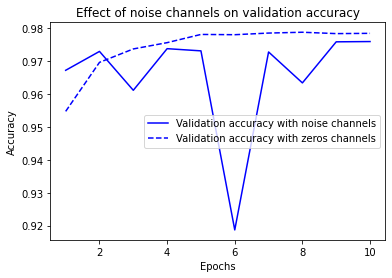

In [6]:
# Graficamos la precision de los modelos
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', 
         label = 'Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', 
         label = 'Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# Ahora vamos a usar los datos correctos
# Invocamos el modelo
model = get_model()

# Definimos el entrenamiento
history = model.fit(train_images, train_labels, 
                    epochs=15, 
                    batch_size=128, 
                    validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 5s 11ms/step - loss: 0.2869 - accuracy: 0.9168 - val_loss: 0.1468 - val_accuracy: 0.9585
Epoch 2/15
375/375 [==============================] - 4s 11ms/step - loss: 0.1195 - accuracy: 0.9648 - val_loss: 0.1123 - val_accuracy: 0.9662
Epoch 3/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0785 - accuracy: 0.9768 - val_loss: 0.0945 - val_accuracy: 0.9716
Epoch 4/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0904 - val_accuracy: 0.9711
Epoch 5/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.0918 - val_accuracy: 0.9734
Epoch 6/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.0824 - val_accuracy: 0.9772
Epoch 7/15
375/375 [==============================] - 4s 11ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0786 - val_accuracy: 0.9797

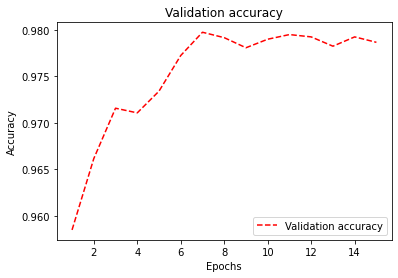

In [9]:
val_acc = history.history['val_accuracy']
epochs = range(1, 16)
plt.plot(epochs, val_acc, 'r--', 
         label= 'Validation accuracy')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

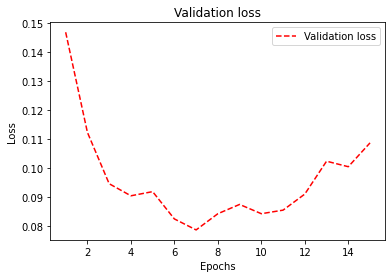

In [11]:
val_loss = history.history['val_loss']
epochs = range(1, 16)
plt.plot(epochs, val_loss, 'r--', 
         label= 'Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()